# Regression

Data collection

In [ ]:
import pandas as pd

In [ ]:
# Read the csv file
df = pd.read_csv('/content/Health_insurance.csv')

In [ ]:
#Display the first 5 rows
df.head()

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19.0,Female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
1,2,18.0,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN
2,3,28.0,mal,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33.0,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32.0,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520


Remove Duplicate Records

In [ ]:
df = df.drop_duplicates(subset=['pid'])

Remove Outliers

In [ ]:
# prompt: remove outliers in all numeric columns

import numpy as np
# Assuming 'df' is your DataFrame and contains numeric columns you want to process.
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)


Handle missing values

In [ ]:
numeric_cols

Index(['pid', 'age', 'bmi', 'children', 'diabetes', 'heart rate', 'Creatinine',
       'glucose', 'charges'],
      dtype='object')

In [ ]:
# Check missing values in all columns
df.isnull().sum()

,0
pid,0
age,0
sex,1
bmi,0
children,0
smoker,0
region,0
diabetes,0
heart rate,0
Creatinine,0


In [ ]:
# Drop rows having NA values in charges column
df = df.dropna(subset=['charges'])

In [ ]:

# Create a list of columns to fill NA values
columns_to_fill = ['bmi', 'heart rate','glucose'] # Example columns, replace with your actual columns

# Fill NA values in specified columns with the mean of each column
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())


Clean categorical columns

In [ ]:
category_cols = df.select_dtypes(include="object").columns

for col in category_cols:
    print(df[col].unique())

['Female' 'mal' 'male' nan 'female']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# replace 'Female' with female in sex column

dict1 = {'Female':'female','mal':'male'}

df['sex'] = df['sex'].replace(dict1)

# Calculate the mode of the column
mode_value = df['sex'].mode()[0]

# Replace NaN values with the mode
df['sex'].fillna(mode_value, inplace=True)


<ipython-input-206-52941839f002>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(mode_value, inplace=True)


In [ ]:
# One-hot encode the sex, smoker, region column data
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

In [ ]:
# Display the first 5 rows
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19.0,27.900,0,1,68.837838,1.958333,114.636364,16884.92400,True,False,False,True,False,False,False,True
2,3,28.0,33.000,3,0,72.318182,1.871429,149.000000,4449.46200,False,True,True,False,False,False,True,False
3,4,33.0,22.705,0,0,94.500000,0.585714,128.250000,21984.47061,False,True,True,False,False,True,False,False
4,5,32.0,28.880,0,0,67.920000,1.950000,145.750000,3866.85520,False,True,True,False,False,True,False,False
5,6,31.0,25.740,0,0,74.181818,1.612500,98.333333,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
# Normalize numerical columns

# Store min-max values for later use
min_max_values = {}

cols = ['age', 'bmi','heart rate','Creatinine','glucose']
for i in cols:
  min_val = df[i].min()
  max_val = df[i].max()
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())
  min_max_values[i] = (min_val, max_val)


In [ ]:
min_max_values

{'age': (18.0, 64.0),
 'bmi': (15.96, 47.52),
 'heart rate': (39.32142857, 129.125),
 'Creatinine': (0.266666667, 3.311111111),
 'glucose': (69.1, 252.0)}

In [ ]:
# Save to a JSON file
import json
with open("min_max_values.json", "w") as json_file:
    json.dump(min_max_values, json_file)

In [ ]:
# Display the first 5 rows
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0.021739,0.378327,0,1,0.328677,0.555657,0.248969,16884.92400,True,False,False,True,False,False,False,True
2,3,0.217391,0.539924,3,0,0.367433,0.527112,0.436851,4449.46200,False,True,True,False,False,False,True,False
3,4,0.326087,0.213720,0,0,0.614436,0.104797,0.323401,21984.47061,False,True,True,False,False,True,False,False
4,5,0.304348,0.409379,0,0,0.318457,0.552920,0.419081,3866.85520,False,True,True,False,False,True,False,False
5,6,0.282609,0.309886,0,0,0.388185,0.442062,0.159832,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
df.corr()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
pid,1.000000,0.022766,-0.006281,0.015532,0.047132,0.065919,0.041176,0.054753,0.016326,-0.036445,0.036445,0.011113,-0.011113,0.014269,0.020061,-0.042108,0.008099
age,0.022766,1.000000,0.128538,0.029483,0.099132,-0.028315,0.029353,0.056884,0.398162,0.049710,-0.049710,0.085711,-0.085711,-0.001406,0.003429,-0.016054,0.014066
bmi,-0.006281,0.128538,1.000000,-0.003137,-0.036752,-0.054100,0.060059,-0.010681,-0.062230,-0.027367,0.027367,0.259813,-0.259813,-0.117858,-0.122109,0.239410,-0.001717
children,0.015532,0.029483,-0.003137,1.000000,-0.020376,-0.045857,0.030975,0.007623,0.052051,0.012224,-0.012224,-0.002326,0.002326,-0.015702,0.015238,-0.012630,0.012965
diabetes,0.047132,0.099132,-0.036752,-0.020376,1.000000,-0.141843,0.142797,0.321035,0.020131,0.004387,-0.004387,0.010703,-0.010703,0.026009,0.011567,-0.010164,-0.027056
heart rate,0.065919,-0.028315,-0.054100,-0.045857,-0.141843,1.000000,-0.194493,-0.024665,-0.004745,0.016162,-0.016162,-0.034387,0.034387,0.040259,-0.077307,0.068628,-0.031413
Creatinine,0.041176,0.029353,0.060059,0.030975,0.142797,-0.194493,1.000000,0.044696,0.048962,-0.009703,0.009703,0.026128,-0.026128,-0.037106,-0.016145,0.062119,-0.009514
glucose,0.054753,0.056884,-0.010681,0.007623,0.321035,-0.024665,0.044696,1.000000,-0.009182,-0.072531,0.072531,0.059436,-0.059436,0.019997,-0.005404,-0.003984,-0.010367
charges,0.016326,0.398162,-0.062230,0.052051,0.020131,-0.004745,0.048962,-0.009182,1.000000,0.018842,-0.018842,-0.602182,0.602182,0.071474,0.022672,-0.035565,-0.057593
sex_female,-0.036445,0.049710,-0.027367,0.012224,0.004387,0.016162,-0.009703,-0.072531,0.018842,1.000000,-1.000000,0.024998,-0.024998,-0.017477,0.010844,0.008301,-0.001884


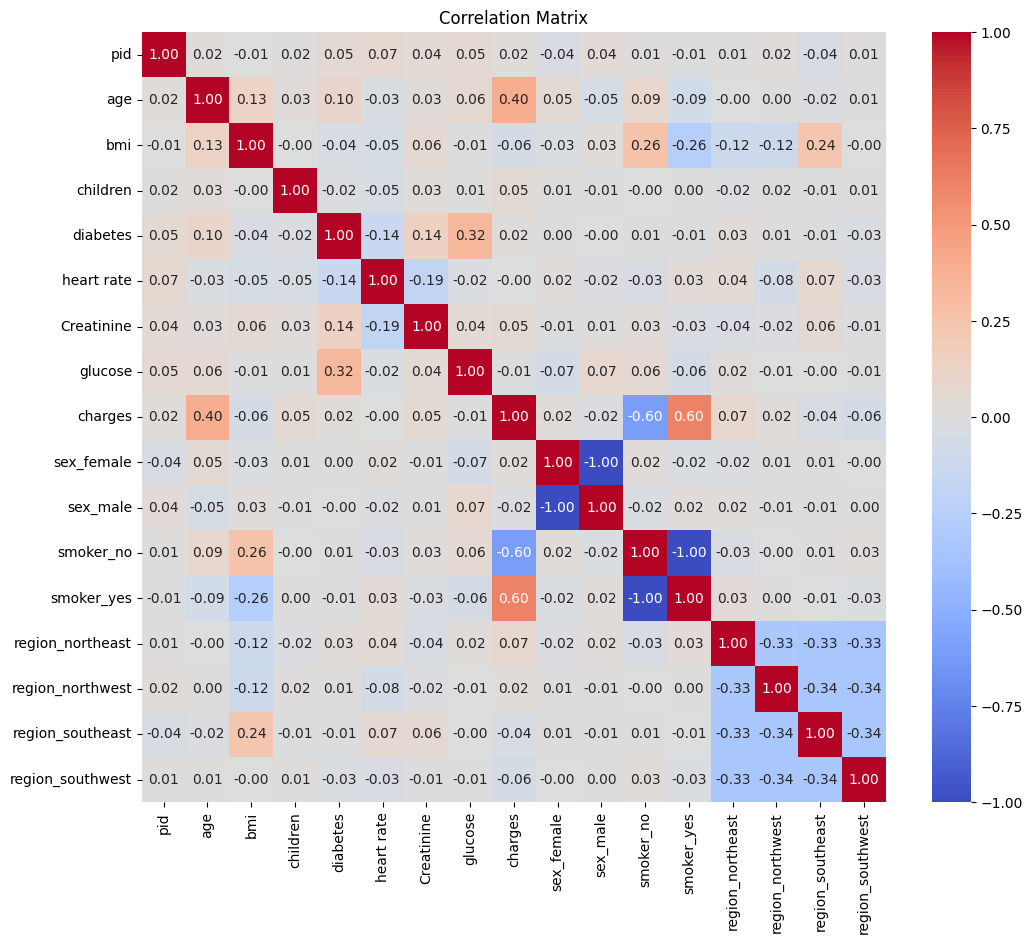

In [ ]:
# prompt: seaborn correlation matrixx

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Train test split

In [ ]:
# Separate the features and target variable
X = df.drop(columns = ['charges','pid','sex_male', 'smoker_yes'], axis=1)
y = df['charges']

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear Regression

In [ ]:
# Linear Regression model to predict the outcome

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
# Predict the target variable for the test set
y_pred = reg.predict(X_test)


In [ ]:
# compute the rmse, r2 score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2)


RMSE:  4908.881291904217
R2:  0.5316342951865664


In [ ]:
pd.DataFrame(X.columns,reg.coef_)

,0
10965.284557,age
2530.201037,bmi
269.512990,children
-266.802083,diabetes
-1013.830114,heart rate
2437.813337,Creatinine
-213.583232,glucose
218.494318,sex_female
-15705.105836,smoker_no
757.817181,region_northeast


In [ ]:
x_test_sample = X_test.iloc[0,:]
x_test_sample_reshaped = np.array(x_test_sample).reshape(1, -1)

In [ ]:
y_pred_sample = reg.predict(x_test_sample_reshaped)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_sample

array([11494.81605439])

In [ ]:
import joblib
joblib.dump(reg, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

# Load the trained model
model = joblib.load('linear_regression_model.pkl')

# Streamlit App
st.title("Insurance Charges Prediction")
st.write("Enter the input values for prediction.")

# Input fields for each feature

age = st.number_input("Age", min_value=18, max_value=65, step=1, value=30)
bmi = st.number_input("BMI", min_value=15.0, max_value=50.0, step=0.1, value=25.0)
children = st.number_input("Number of Children", min_value=0, max_value=10, step=1, value=0)
diabetes = st.selectbox("Has Diabetes?", options=["No", "Yes"])
heart_rate = st.number_input("Heart Rate", min_value=50, max_value=120, step=1, value=75)
creatinine = st.number_input("Creatinine", min_value=0.0, max_value=2.0, step=0.1, value=1.0)
glucose = st.number_input("Glucose", min_value=50.0, max_value=300.0, step=1.0, value=100.0)

# Categorical features
sex_female = st.selectbox("Sex", options=["Male", "Female"]) == "Female"
smoker_no = st.selectbox("Smoker?", options=["Yes", "No"]) == "No"

# Region selection
region = st.selectbox("Region", options=["Northeast", "Northwest", "Southeast", "Southwest"])
region_northeast = region == "Northeast"
region_northwest = region == "Northwest"
region_southeast = region == "Southeast"
region_southwest = region == "Southwest"

# Normalization function
def min_max_scale(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Load Min-Max values from JSON
with open("min_max_values.json", "r") as json_file:
    min_max_values = json.load(json_file)

# Normalize inputs
age_norm = min_max_scale(age, *min_max_values['age'])
bmi_norm = min_max_scale(bmi, *min_max_values['bmi'])
heart_rate_norm = min_max_scale(heart_rate, *min_max_values['heart rate'])
creatinine_norm = min_max_scale(creatinine, *min_max_values['Creatinine'])
glucose_norm = min_max_scale(glucose, *min_max_values['glucose'])

# Prepare input data for prediction
input_data = np.array([
    age_norm, bmi_norm, children, int(diabetes == "Yes"), heart_rate_norm, creatinine_norm, glucose_norm,
    int(sex_female), int(smoker_no), int(region_northeast), int(region_northwest),
    int(region_southeast), int(region_southwest)
]).reshape(1, -1)

# Predict button
if st.button("Predict Charges"):
    prediction = model.predict(input_data)
    st.success(f"Predicted Insurance Charges: ${prediction[0]:,.2f}")

"""
# Save the code to a file
with open('app.py', 'w') as f:
    f.write(streamlit_code)

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2VhfMAwGeQgS75KRWpcXKDgOAKY_2FKRsWFNpPVv6dpUeEUxv")

In [ ]:
from pyngrok import ngrok

# Expose the Streamlit server running on port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit App is live at: {public_url}")


Streamlit App is live at: NgrokTunnel: "https://87b3-34-125-39-242.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# Kill all existing ngrok processes
!pkill -f ngrok

In [ ]:
# Polynomial regression model to predict the outcome
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

# Predict the output for new data

X_new_poly = poly.transform(X_test)
y_pred = model.predict(X_new_poly)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 6969.8499953743
R2: 0.617955748832657
